In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2024-02-19 12:40:04.258497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 12:40:04.900045: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-02-19 12:40:04.900087: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-02-19 12:40:04.900094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [18]:
link = "DroughtDatasetMask/ResultadosEspacioLatente/v02w10_0a1/"

archivoData = "PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy"
linkDecodificador = "/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Models/Autoencoder_Cat_60_180_0a1_v1/decoder_60x180.h5"

In [19]:
data = np.load(link+archivoData)
print("data" , link+archivoData)
print("data shape",data.shape)

data DroughtDatasetMask/ResultadosEspacioLatente/v02w10_0a1/PredictionsConvolutionLSTM_forecast_60_180_EspacioLatente_w10.npy
data shape (374, 9, 60, 180, 1)


<Figure size 2000x2000 with 0 Axes>

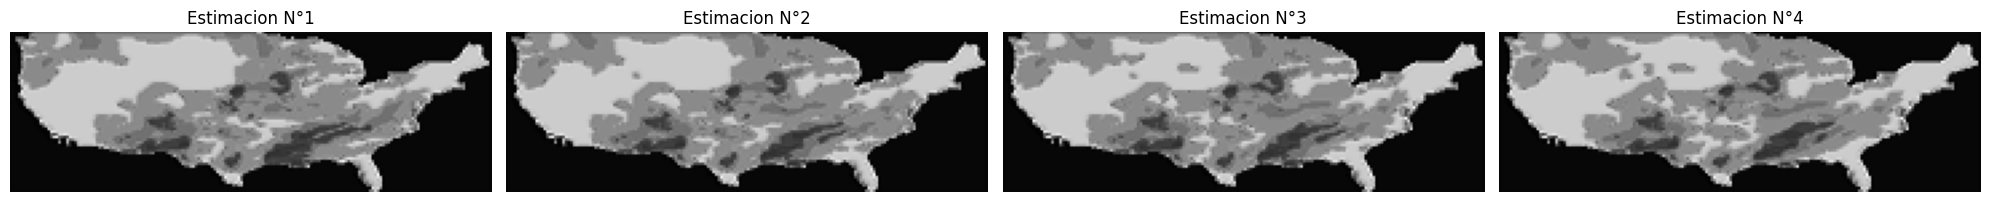

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 373
horizon = 4

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [21]:
# carga del decodor 
decoder = keras.models.load_model(linkDecodificador)
print (decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 60, 180, 1)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 180, 8)        80        
                                                                 
 up_sampling2d_3 (UpSampling  (None, 120, 360, 8)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 120, 360, 1)       73        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [22]:

print("shape data",data[pos].shape)
print("data dtype",data[pos].dtype)
print("data",data.dtype)
data255 = data 

print("data max",data255.max())
print("data min",data255.min())
print("data shape",data255.shape)



shape data (9, 60, 180, 1)
data dtype float32
data float32
data max 0.5716197
data min 0.0018446838
data shape (374, 9, 60, 180, 1)


prueba

In [25]:
encoder = keras.models.load_model("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Models/Autoencoder_Cat_60_180_v5/encoder_60x180_v3_mse0.0019440342.h5")
cargaData120x360 = np.load("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Npy/Dataset120x360Greys.npy")
print("cargaData120x360 shape",cargaData120x360.shape)
imgGray1 = cargaData120x360[1230]
print("imgGray1 shape",imgGray1.shape)
imgGray1 = np.expand_dims(imgGray1, axis=0)
print("imgGray1 shape",imgGray1.shape)
print("imgGray1 dtype",imgGray1.dtype)
imgGray1 = np.expand_dims(imgGray1, axis=3)
resultadoImgGray1 = encoder.predict(imgGray1)
print("resultadoImgGray1 shape",resultadoImgGray1.shape)
print("resultadoImgGray1 dtype",resultadoImgGray1.dtype)
print("resultadoImgGray1 max",resultadoImgGray1.max())
print("resultadoImgGray1 min",resultadoImgGray1.min())

#agregar resultado a un arreglo
resultado = []
horizon = 1253
for i in range(horizon):
    imgGray1 = np.expand_dims(cargaData120x360[i], axis=0)
    imgGray1 = np.expand_dims(imgGray1, axis=3)
    resultadoImgGray1 = encoder.predict(imgGray1)
    resultado.append(resultadoImgGray1)


cargaData120x360 shape (1254, 120, 360)
imgGray1 shape (120, 360)
imgGray1 shape (1, 120, 360)
imgGray1 dtype float32
1/1 [==============================] - 0s 38ms/step
resultadoImgGray1 shape (1, 60, 180, 1)
resultadoImgGray1 dtype float32
resultadoImgGray1 max 4.9827447
resultadoImgGray1 min 0.0
1/1 [==============================] - 0s 14ms/step


In [31]:
print ("resultado shape",np.array(resultado).shape)
print ("resultado dtype",np.array(resultado).dtype)
print ("resultado max",np.array(resultado[0]).max())
print ("resultado min",np.array(resultado[0]).min())

print(resultado[0])

resultado shape (1253, 1, 60, 180, 1)
resultado dtype float32
resultado max 4.9827447
resultado min 0.0
[[[[1.7464147]
   [1.8029935]
   [1.8029935]
   ...
   [1.8029935]
   [1.8029935]
   [1.8333523]]

  [[3.2997644]
   [3.184703 ]
   [3.1284647]
   ...
   [3.2268376]
   [3.2268376]
   [3.3229766]]

  [[3.2997644]
   [3.2338524]
   [2.3647027]
   ...
   [3.2268376]
   [3.2268376]
   [3.3229766]]

  ...

  [[3.2997644]
   [3.2268376]
   [3.2268376]
   ...
   [3.2268376]
   [3.2268376]
   [3.3229766]]

  [[3.2997644]
   [3.2268376]
   [3.2268376]
   ...
   [3.2268376]
   [3.2268376]
   [3.3229766]]

  [[3.2223265]
   [3.2257147]
   [3.2257147]
   ...
   [3.2257147]
   [3.2257147]
   [3.37741  ]]]]


In [32]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 360, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 120, 360, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 180, 8)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 180, 1)        73        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [7]:
cargadataae = np.load("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Npy/Dataset60x180v3.npy")
print("cargadataae shape",cargadataae.shape)
print ("cargadataae dtype",cargadataae.dtype)
print("cargadataae min",cargadataae.min())
print("cargadataae max",cargadataae.max())
data1 = cargadataae[1230]
print("data1 shape",data1.shape)
print("")

print("data1 max",data1.max())
print("data1 min",data1.min())

data1 = np.expand_dims(data1, axis=0)
print("data1 shape",data1.shape)
data1 = np.expand_dims(data1, axis=3)
resultdata1 = decoder.predict(resultado[1230])
print("resultdata1 shape",resultdata1.shape)

plt.imshow(resultdata1[0], cmap='gray')
plt.axis('off')
plt.show()


cargadataae shape (1254, 60, 180)
cargadataae dtype float32
cargadataae min 0.0
cargadataae max 1.0
data1 shape (60, 180)

data1 max 1.0
data1 min 0.0
data1 shape (1, 60, 180)


NameError: name 'resultado' is not defined

In [ ]:

print("data1 shape",data1.shape)
print("data1 dtype",data1.dtype)
print("")
data12 = np.squeeze(data1)
print("data1 shape",data12.shape)    
print("")
data11 = data1
print("data11 shape",data11.shape)
print("data1 max",data1.max())
print("data1 min",data1.min())
data1 = np.expand_dims(data1, axis=0)
resultdata1 = decoder.predict(data1)
print("resultdata1 shape",resultdata1.shape)

resultdata1 shape (120, 360, 1)


<Figure size 2000x2000 with 0 Axes>

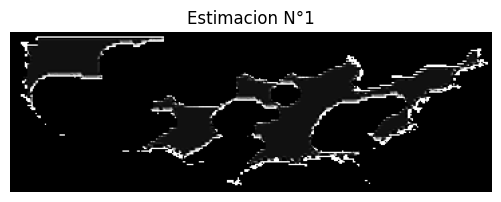

In [22]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 5

print("resultdata1 shape",resultdata1[0].shape)

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(resultdata1[pos][i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [47]:
#result = decoder.predict(data[pos])
#print("result shape", result.shape)
results = np.zeros((374, 9, 120, 360, 1))

for i in range(data.shape[0]):
    # Selecciona los últimos 4 marcos de cada muestra
    #last_4_frames = data[i, -4:, :, :, :]
    datas255 = data255[i, :, :, :, :]
    # Realiza la predicción utilizando los últimos 4 marcos
    result = decoder.predict(datas255)
    
    # Guarda el resultado en el arreglo de resultados
    results[i] = result
    print("result N°",i, "shape", result.shape)


#guardar resultado
np.save(link+"resultadosDecoder.npy", results)

1/1 [==============================] - 0s 32ms/step
result N° 0 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 20ms/step
result N° 1 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 2 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 16ms/step
result N° 3 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 18ms/step
result N° 4 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 19ms/step
result N° 5 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 19ms/step
result N° 6 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 18ms/step
result N° 7 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 8 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 21ms/step
result N° 9 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 17ms/step
result N° 10 shape (9, 120, 360, 1)
1/1 [==============================] - 0s 

In [48]:
print ("results shape", results.shape)

results shape (374, 9, 120, 360, 1)


<Figure size 2000x2000 with 0 Axes>

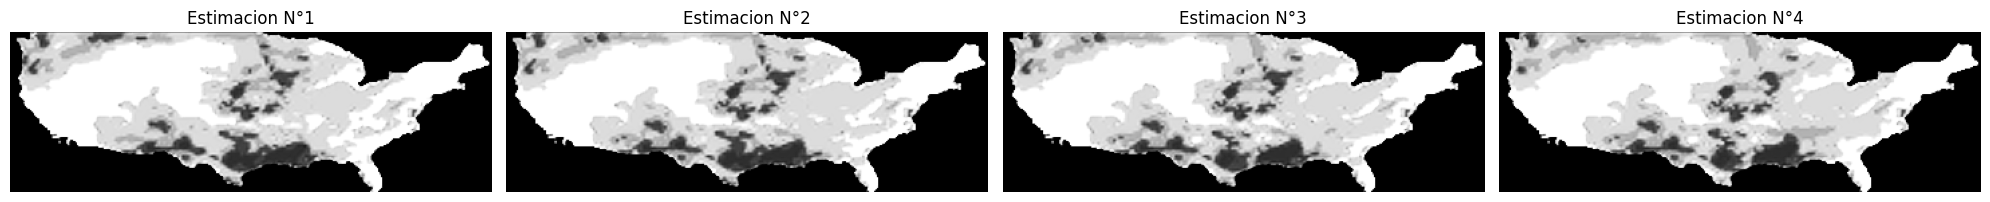

In [49]:

fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()


In [50]:
valoresUnicos = np.unique(results) 
print("valores unicos",valoresUnicos)

valoresunicosContador = len(valoresUnicos)
print("valores unicos contador",valoresunicosContador)

print("results shape", results.shape)
print("results dtype", results.dtype)

valores unicos [7.48141662e-27 7.64925679e-27 7.78947990e-27 ... 9.99999762e-01
 9.99999881e-01 1.00000000e+00]
valores unicos contador 13846876
results shape (374, 9, 120, 360, 1)
results dtype float64


In [51]:
results = results.astype(np.float32)
resultados = results * 255.0
print("results dtype",resultados.dtype)
minimos = np.min(resultados)
maximos = np.max(resultados)
print("minimos",minimos)
print("maximos",maximos)


results dtype float32
minimos 1.9077613e-24
maximos 255.0


# categorizacion

In [52]:
def create_shifted_frames_2(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, data.shape[1]-1, :, :]
    return x, y

#Toma todos los colores existentes en la imagen
def get_colors(image):
  aux = []
  band = True
  for i in image:
    for j in i:

      for k in aux:
        if j.tolist() == k:
          band = False
          break
      if band:
        aux.append(j.tolist())
      band = True
  return np.array(aux)

def balance_img_categories(img, palette, balancer):
  #palette = np.sort(palette)
  rows = len(img)
  cols = len(img[0])
  for i in range(rows):
    for j in range(cols):
      pos = np.where(palette == img[i,j])[0][0]
      img[i,j] = balancer[pos]
  return img


#Función para dada una paleta solo tomar los colores de esa paleta en la imagen
def quantizetopalette(silf, palette, dither=False, mode="P"):
  """Convert an RGB or L mode image to use a given P image's palette."""
  silf.load()
  palette.load()
  im = silf.im.convert(mode, 0, palette.im)
  # the 0 above means turn OFF dithering making solid colors
  return silf._new(im)

#Realiza las operaciones necesarias para obtener una imagen RGB por una paleta de colores
def rgb_quantized(img, palette):
  rows, cols = len(img), len(img[0])
  total_vals = 1
  for i in palette.shape:
    total_vals *= i
  palettedata = palette.reshape(total_vals).tolist()
  palImage = Image.new('P', (rows, cols))
  palImage.putpalette(palettedata*32)
  oldImage = Image.fromarray(img).convert("RGB")
  newImage = quantizetopalette(oldImage,palImage)
  res_image = np.asarray(newImage.convert("RGB"))
  return res_image

def gray_quantized(img, palette):
  rows, cols = len(img), len(img[0])
  total_vals = 1
  for i in palette.shape:
    total_vals *= i
  palettedata = palette.reshape(total_vals).tolist()
  palImage = Image.new('L', (rows, cols))
  palImage.putpalette(palettedata*32)
  oldImage = Image.fromarray(img, 'L')
  newImage = quantizetopalette(oldImage,palImage, mode="L")
  res_image = np.asarray(newImage)
  return res_image

def recolor_greys_image(data, palette):
    rows, cols = len(data), len(data[0])
    aux = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            aux[i,j] = min(palette, key= lambda x:abs(x-data[i,j]))
    return aux


def agroup_window(data, window):
    new_data = [data[i:window+i] for i in range(len(data)-window+1)]
    return np.array(new_data)


def add_last(data, new_vals):
    print(f"data: {data.shape} y new_val: {new_vals.shape}")
    x_test_new = data[:,1:]
    print(f"x_test_new: {x_test_new.shape}")

    l = []
    for i in range(len(x_test_new)):
        l.append(np.append(x_test_new[i], new_vals[i]))
    x_test_new = np.array(l).reshape(data.shape[:])
    print("CX", x_test_new.shape)
    return x_test_new

def add_lastNew(data, new_val):
    print(f"data: {data.shape} y new_val: {new_val.shape}")
    x_test_new = data[:,1:,...]  # Omite el primer paso de tiempo
    print(f"x_test_new: {x_test_new.shape}")

    # Asumiendo que new_val es una única predicción que se debe añadir a cada paso de tiempo en x_test_new
    new_val = new_val.squeeze(axis=0)  # Elimina la dimensión del batch, si es necesario

    print(new_val.shape)
    # Añadir new_val a cada elemento en x_test_new
    x_test_new = np.concatenate((x_test_new, np.expand_dims(new_val, axis=1)), axis=1)

    print("CX", x_test_new.shape)
    return x_test_new


    #Crea cubos con su propia información de tamaño h
def get_cubes(data, h):
    new_data = []
    for i in range(0, len(data)-h):
        new_data.append(data[i:i+h])
    new_data = np.array(new_data)
    print(new_data.shape)
    return new_data

In [53]:
classes = np.array([0, 255, 220, 177, 119, 70, 35]) # 255, 220, 177, 119, 70, 35  0


h = 4
#results = np.expand_dims(results, axis=0)
#print("results shape" ,results.shape)

print("results" ,resultados.shape)
colorss = get_colors(resultados[-10,0])
print("COLORSS", colorss)
print("new_results",resultados.shape)
print("color shape",colorss.shape)


results (374, 9, 120, 360, 1)
COLORSS [[7.14882617e-06]
 [5.55532097e-07]
 [2.58399887e-05]
 ...
 [8.58654019e-08]
 [1.03186704e-08]
 [9.67204414e-07]]
new_results (374, 9, 120, 360, 1)
color shape (24080, 1)


In [54]:

#
resultados = resultados[1:-3]
new_results = resultados[:, -h:]
#
print("new_results",new_results.shape)
print(min(new_results[0,0,59]))
print(max(new_results[0,0,59]))
#
print("new_results dtype",new_results.dtype)
#new_results = new_results * 255
#new_results = new_results.astype(np.uint8)
print("new_results", new_results.shape)
print("Colores",colorss.shape)


new_results (370, 4, 120, 360, 1)
[6.769691e-17]
[255.]
new_results dtype float32
new_results (370, 4, 120, 360, 1)
Colores (24080, 1)


In [55]:

print(min(new_results[0,0,59]))
print(max(new_results[0,0,59]))
#
new_results = new_results.reshape(new_results.shape[:-1])
print("HoY", new_results.shape)
#
aux = []
for i in new_results:
    aux2 = []
    for j in i:
        #res = cv2.cvtColor(j, cv2.COLOR_GRAY2RGB)
        #res = recolor_greys_image(j, classes)
        #rgb_quantized(res, classes_rgb)
        #res = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
        res = gray_quantized(j, classes)
        res = recolor_greys_image(res, classes)
        aux2.append(res)
    aux.append(np.array(aux2))
#
new_results = np.array(aux)
print("SHAPEE", new_results.shape)
color_results = get_colors(new_results[-10,0])
print("DCOLORS", color_results)
new_results = new_results.reshape(new_results.shape[0],new_results.shape[1],new_results.shape[2],new_results.shape[3],1)
#
print("DCOLORS", get_colors(new_results[-10,0]))
print(f"new results shape {new_results.shape}")
print(f"new results dtype {new_results.dtype}")

[6.769691e-17]
[255.]
HoY (370, 4, 120, 360)
SHAPEE (370, 4, 120, 360)
DCOLORS [  0. 220.  70. 119. 177.  35. 255.]
DCOLORS [[  0.]
 [220.]
 [ 70.]
 [119.]
 [177.]
 [ 35.]
 [255.]]
new results shape (370, 4, 120, 360, 1)
new results dtype float32


valores unicos de imagen [  0.  35.  70. 119. 177. 220. 255.]
dtype float32
valores unicos de imagen [  0.  35.  70. 119. 177. 220. 255.]
dtype float32
valores unicos de imagen [  0.  35.  70. 119. 177. 220. 255.]
dtype float32
valores unicos de imagen [  0.  35.  70. 119. 177. 220. 255.]
dtype float32


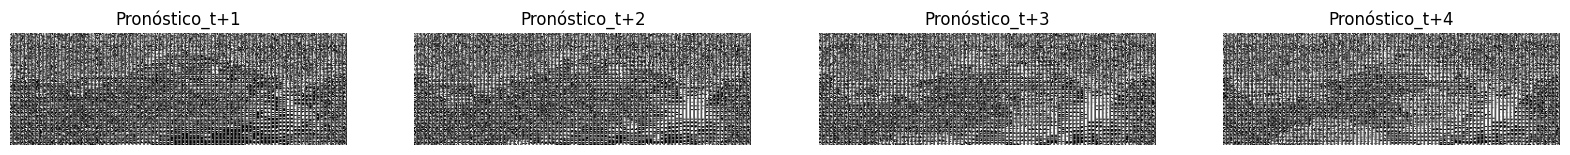

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
r = 3
c = 4
ac = 1
pos = 363
horizon = 4

for i in range(h):
    fig.add_subplot(r, c, ac)
    ac += 1
    plt.imshow(new_results[pos,i], cmap='gray')
    plt.axis('off')
    plt.title('Pronóstico_t+{}'.format(i+1))
    valoresUnicosdeImagen = np.unique(new_results[pos,i])
    print("valores unicos de imagen",valoresUnicosdeImagen)
    print("dtype",new_results[pos,i].dtype)


In [57]:
print(new_results[0, 0])


[[[177.]
  [255.]
  [177.]
  ...
  [177.]
  [  0.]
  [ 70.]]

 [[177.]
  [220.]
  [  0.]
  ...
  [ 70.]
  [220.]
  [ 70.]]

 [[ 35.]
  [ 70.]
  [177.]
  ...
  [119.]
  [119.]
  [ 70.]]

 ...

 [[ 35.]
  [119.]
  [119.]
  ...
  [  0.]
  [119.]
  [ 70.]]

 [[  0.]
  [  0.]
  [119.]
  ...
  [  0.]
  [177.]
  [ 35.]]

 [[  0.]
  [177.]
  [ 70.]
  ...
  [  0.]
  [177.]
  [ 35.]]]
